### Lesson 3. Plot Histograms of Raster Values in Python

**In This Lesson**
Learning Objectives
* Open Raster Data in Python
* Raster Histograms - Distribution of Elevation Values
* What Does a Histogram Tell You?

#### Learning Objectives

After completing this tutorial, you will be able to:

* Explore the distribution of values within a raster using histograms.
* Plot a histogram of a raster dataset in Python using matplotlib.

In the last lesson, you discussed 3 key attributes of a raster dataset:

1. Spatial resolution
2. Spatial extent and
3. Coordinate reference systems

In this lesson, you will learn how to use histograms to better understand the distribution of your data.

### Open Raster Data in Python

To work with raster data in Python, you can use the rasterio and numpy packages. Remember you can use the raserio context manager to import the raster object into Python.

In [12]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
# inline plotting
plt.ion()

import earthpy as et

os.chdir("/Users/markb/earth-analytics")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# prettier plotting with seaborn
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

# format histogram
plt.rcParams['figure.figsize'] = (8, 8)

As you did in the previous lessons, you can open your raster data using rio.open().

In [15]:
# open data and assign negative values to nan
with rio.open('data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    lidar_dem_im = src.read(1)
    lidar_dem_im[lidar_dem_im < 0] = np.nan
    
# view object dimensions
lidar_dem_im.shape

(2000, 4000)

### Raster Histograms - Distribution of Elevation Values

The histogram below represents the distribution of pixel elevation values in your data. This plot is useful to:

1. Identify outlier data values
2. Assess the min and max values in your data
3. Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

To begin, you will look at the shape of your lidar array object

In [16]:
# the .ravel method turns a 2-D numpy array into a 1-D vector
print(lidar_dem_im.shape)
print(lidar_dem_im.ravel().shape)

(2000, 4000)
(8000000,)


If your array has nan values in it, it’s best to remove the nan values before trying to plot a histogram. Below you

1. flatten the data so it can be coerced into a histogram using .ravel()
2. remove nan values lidar_dem_hist[~np.isnan(lidar_dem_hist)]

In [17]:
# remove the 'nan' values for plotting
lidar_dem_hist = lidar_dem_im.ravel()
lidar_dem_hist = lidar_dem_hist[~np.isnan(lidar_dem_hist)]

Once you have cleaned up the data you can plot a histogram.

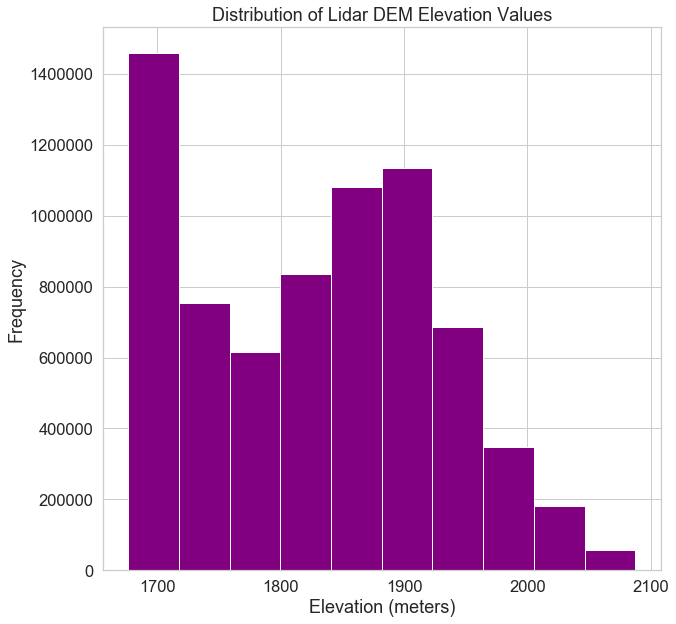

In [25]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.hist(lidar_dem_hist, color = 'purple')
ax.set(xlabel = 'Elevation (meters)', 
      ylabel = 'Frequency', 
      title = "Distribution of Lidar DEM Elevation Values");

This plot displays a histogram of lidr dem elevation values.

### What Does a Histogram Tell You?

A histogram shows us how the data are distributed. Each bin or bar in the plot represents the number or frequency of pixels that fall within the range specified by the bin.

You can use the bins= argument to specify fewer or more breaks in your histogram. Note that this argument does not result in the exact number of breaks that you may want in your histogram.

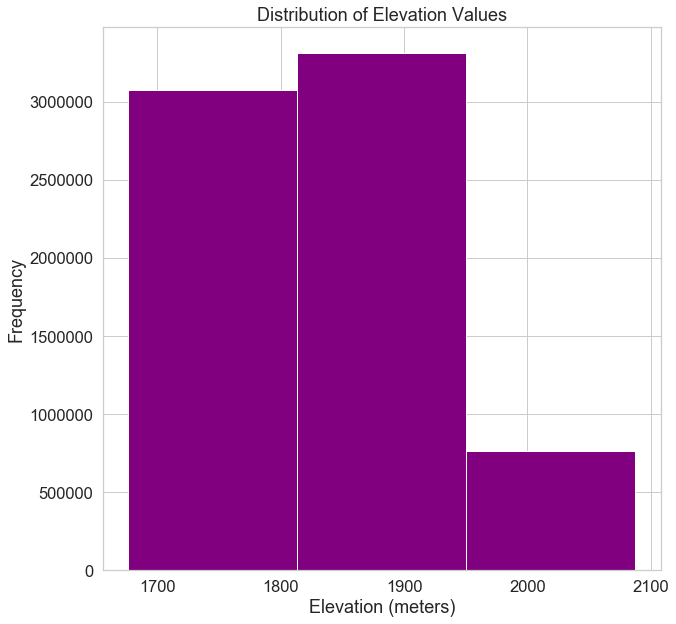

In [27]:
fig, ax = plt.subplots(figsize= (10, 10))
ax.hist(lidar_dem_hist,
       color = 'purple', 
       bins = 3)
ax.set(title = "Distribution of Elevation Values", 
       xlabel = 'Elevation (meters)', 
       ylabel = 'Frequency');

This plot displays a histogram of lidar dem elevation values with 3 bins

Alternatively, you can specify specific break points that you want Python to use when it bins the data.

bins=[1600, 1800, 2000, 2100]

In this case, Python will count the number of pixels that occur within each value range as follows:

* bin 1: number of pixels with values between 1600-1800
* bin 2: number of pixels with values between 1800-2000
* bin 3: number of pixels with values between 2000-2100

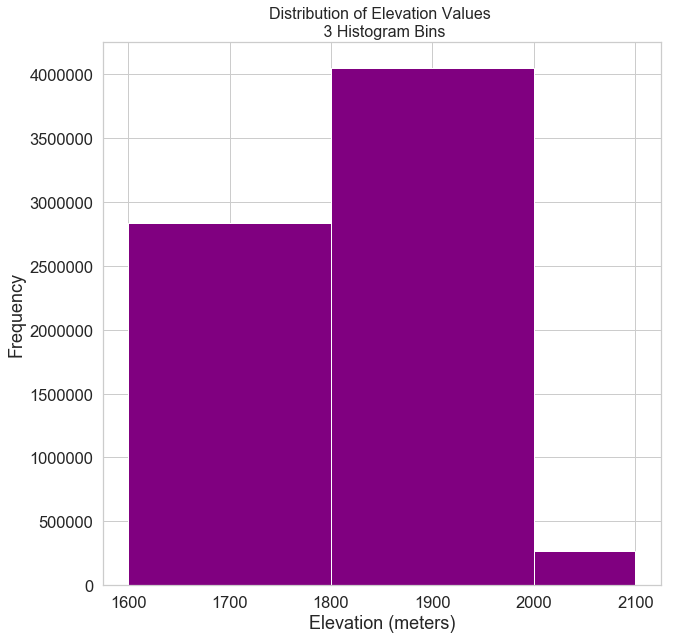

In [28]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.hist(lidar_dem_hist, bins = [1600, 1800, 2000, 2100], color = 'purple')
ax.set_title("Distribution of Elevation Values \n 3 Histogram Bins", 
            fontsize = 16)
ax.set_xlabel('Elevation (meters)')
ax.set_ylabel('Frequency');

This plot displays a histogram of lidar dem elevation values with 3 bins.